In [40]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.graph_objects as go
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading Dataset

In [2]:
star_wars = pd.read_csv("D:\Developer\Data Science\Projects\Star Wars Movies Survey_Project\CSV File\star_wars.csv")

## Oveview of the Dataframe

In [3]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


In [4]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

## Cleaning and Mapping Yes/No Columns
    Conversion to Boolean Type

In [8]:
yes_no = {'Yes' : True, 
          'No' : False, 
          'NaN' : np.NaN}

#series.map() will change the values to boolean type
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)
star_wars['Are you familiar with the Expanded Universe?'] = star_wars['Are you familiar with the Expanded Universe?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Expanded Universe?'] = star_wars['Do you consider yourself to be a fan of the Expanded Universe?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(yes_no)

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [10]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].isnull().sum()

0

##  Cleaning and Mapping Checkbox Columns

In [11]:
#renaming column names to something more intutive
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.' : 'Episode_1: Seen', 
                                      'Unnamed: 4' : 'Episode_2: Seen', 
                                      'Unnamed: 5' : 'Episode_3: Seen', 
                                      'Unnamed: 6' : 'Episode_4: Seen', 
                                      'Unnamed: 7' : 'Episode_5: Seen', 
                                      'Unnamed: 8' : 'Episode_6: Seen'})
#mapping values
ep_1_6_yn = {'Star Wars: Episode I  The Phantom Menace' : True, 
             'Star Wars: Episode II  Attack of the Clones' : True, 
             'Star Wars: Episode III  Revenge of the Sith' : True, 
             'Star Wars: Episode IV  A New Hope' : True, 
             'Star Wars: Episode V The Empire Strikes Back' : True, 
             'Star Wars: Episode VI Return of the Jedi' : True,   
             np.NaN : False}

star_wars['Episode_1: Seen'] = star_wars['Episode_1: Seen'].map(ep_1_6_yn)
star_wars['Episode_2: Seen'] = star_wars['Episode_2: Seen'].map(ep_1_6_yn)
star_wars['Episode_3: Seen'] = star_wars['Episode_3: Seen'].map(ep_1_6_yn)
star_wars['Episode_4: Seen'] = star_wars['Episode_4: Seen'].map(ep_1_6_yn)
star_wars['Episode_5: Seen'] = star_wars['Episode_5: Seen'].map(ep_1_6_yn)
star_wars['Episode_6: Seen'] = star_wars['Episode_6: Seen'].map(ep_1_6_yn)

star_wars.iloc[:,3:8]

,Episode_1: Seen,Episode_2: Seen,Episode_3: Seen,Episode_4: Seen,Episode_5: Seen
0,True,True,True,True,True
1,False,False,False,False,False
2,True,True,True,False,False
3,True,True,True,True,True
4,True,True,True,True,True
...,...,...,...,...,...
1181,True,True,True,True,True
1182,True,True,True,True,True
1183,False,False,False,False,False
1184,True,True,True,True,True


## Cleaning the Ranking Columns

In [12]:
star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'Ranking Episode_1', 
                          'Unnamed: 10' : 'Ranking Episode_2',  
                          'Unnamed: 11' : 'Ranking Episode_3', 
                          'Unnamed: 12' : 'Ranking Episode_4', 
                          'Unnamed: 13' : 'Ranking Episode_5', 
                          'Unnamed: 14' : 'Ranking Episode_6' }, inplace= True)

#changing type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype('float')

In [13]:
star_wars.iloc[:,9:15]

,Ranking Episode_1,Ranking Episode_2,Ranking Episode_3,Ranking Episode_4,Ranking Episode_5,Ranking Episode_6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0
...,...,...,...,...,...,...
1181,5.0,4.0,6.0,3.0,2.0,1.0
1182,4.0,5.0,6.0,2.0,3.0,1.0
1183,NaN,NaN,NaN,NaN,NaN,NaN
1184,4.0,3.0,6.0,5.0,2.0,1.0


## Finding Highest Ranked Movie

In [14]:
sns.set_style('white')

In [15]:
star_wars_mean = star_wars[star_wars.columns[9:15]].mean()
star_wars_mean

Ranking Episode_1    3.732934
Ranking Episode_2    4.087321
Ranking Episode_3    4.341317
Ranking Episode_4    3.272727
Ranking Episode_5    2.513158
Ranking Episode_6    3.047847
dtype: float64

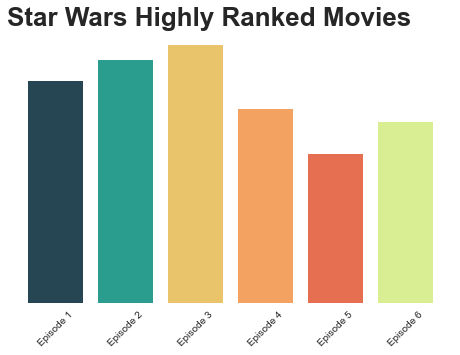

In [16]:
fig, ax = plt.subplots(figsize= (8,5))
bar_viz = plt.bar(range(6), star_wars_mean, color= ['#264653','#2a9d8f','#e9c46a','#f4a261','#e76f51','#d9ed92'])

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False) #Removing boundaries

labelx = [item.get_text() for item in ax.get_xticklabels()]
labelx[1] = 'Episode 1'
labelx[2] = 'Episode 2'
labelx[3] = 'Episode 3'
labelx[4] = 'Episode 4'
labelx[5] = 'Episode 5'
labelx[6] = 'Episode 6'
ax.set_xticklabels(labelx, rotation = 45)
ax.tick_params(axis = 'x', color='#ced4da')
ax.set_yticks([]) #removed yticks
ax.text(-0.69, 4.65, 'Star Wars Highly Ranked Movies', size=26, weight='bold') #add title

plt.show()

## Finding the Most Viewed Movie

In [17]:
most_viewed = star_wars.iloc[:,3:9].sum()
most_viewed

Episode_1: Seen    673
Episode_2: Seen    571
Episode_3: Seen    550
Episode_4: Seen    607
Episode_5: Seen    758
Episode_6: Seen    738
dtype: int64

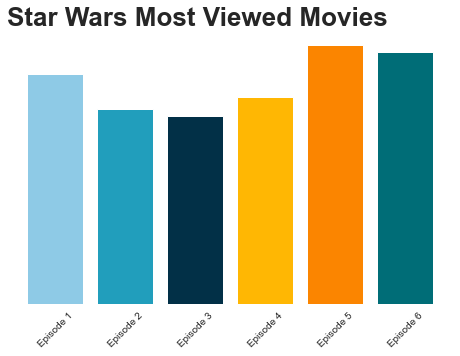

In [18]:
fig, ax = plt.subplots(figsize= (8,5))
bar_viz = plt.bar(range(6), most_viewed, color= ['#8ecae6','#219ebc','#023047','#ffb703','#fb8500', '#006d77'])

for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False) #Removing boundaries

labelx = [item.get_text() for item in ax.get_xticklabels()]
labelx[1] = 'Episode 1'
labelx[2] = 'Episode 2'
labelx[3] = 'Episode 3'
labelx[4] = 'Episode 4'
labelx[5] = 'Episode 5'
labelx[6] = 'Episode 6'
ax.set_xticklabels(labelx, rotation = 45)
ax.tick_params(axis = 'x', color='#ced4da')
ax.set_yticks([]) #removed yticks
#ax.text(-0.4, 4.65, 'Star Wars Most Viewed Movies', size=26, weight='bold') #add title
plt.title('Star Wars Most Viewed Movies', loc= 'left', weight= 'bold', fontsize= 26)

plt.show()

## Exploring the Data by Binary Segments

In [19]:
#most viewed
males = star_wars[star_wars['Gender'] == 'Male'] 
male_fans = males[males.columns[3:9]].sum()
females = star_wars[star_wars['Gender'] == 'Female']
female_fans = females[females.columns[3:9]].sum()
#ranking
male_fans_rank = males[males.columns[9:15]].mean() 
female_fans_rank = females[females.columns[9:15]].mean()

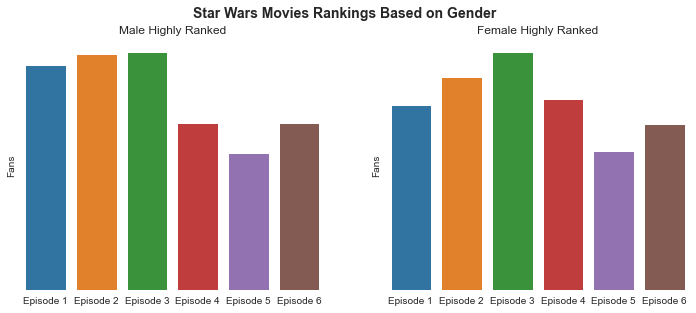

In [20]:
fig, axes = plt.subplots(1,2, figsize=(12,4.6))
fig.suptitle('Star Wars Movies Rankings Based on Gender', fontsize= 14, weight='bold')

x1 = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']

#Male Fans Rankings
mr = sns.barplot(ax=axes[0], x=x1, y=male_fans_rank.values)
axes[0].set_title('Male Highly Ranked', fontsize= 12)
_ = mr.set(ylabel="Fans")

#Female Fans Rankings
fr = sns.barplot(ax=axes[1], x=x1, y=female_fans_rank.values)
axes[1].set_title('Female Highly Ranked', fontsize= 12)
_ = fr.set(ylabel="Fans")

for l in ['left', 'right', 'top', 'bottom']:
    axes[0].spines[l].set_visible(False)
    axes[1].spines[l].set_visible(False)
    
axes[0].set_yticks([])
axes[1].set_yticks([])

plt.show()

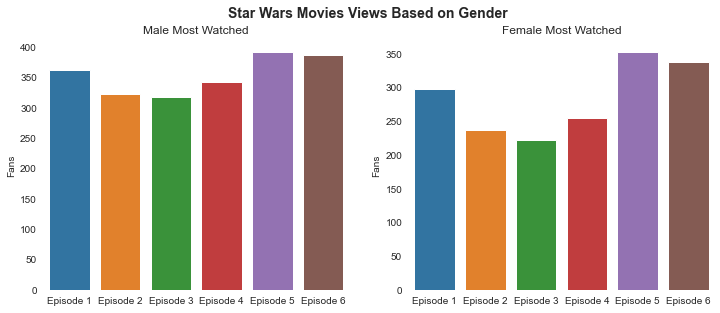

In [21]:
fig, axes = plt.subplots(1,2, figsize=(12, 4.6))
fig.suptitle('Star Wars Movies Views Based on Gender', fontsize= 14, weight='bold', )

x1 = ['Episode 1', 'Episode 2', 'Episode 3', 'Episode 4', 'Episode 5', 'Episode 6']

#Male Fans Most Watched
mw = sns.barplot(ax=axes[0],x=x1, y=male_fans)
axes[0].set_title('Male Most Watched', fontsize= 12)
_ = mw.set(ylabel="Fans")

#female Fans Most Watched
fw = sns.barplot(ax=axes[1],x=x1, y=female_fans)
axes[1].set_title('Female Most Watched', fontsize= 12)
_ = fw.set(ylabel="Fans")

for l in ['left', 'right', 'top', 'bottom']:
    axes[0].spines[l].set_visible(False)
    axes[1].spines[l].set_visible(False)
    
plt.show()

In [22]:
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
print(('Total Number of fans: {}'.format(fans.shape[0])))

Total Number of fans: 552


## Exploring Ages of Fans

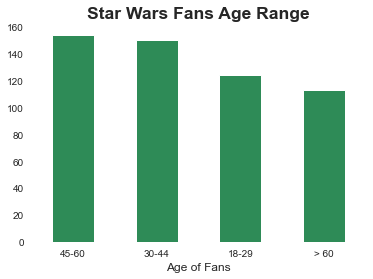

In [23]:
fig, ax = plt.subplots()

fans['Age'].value_counts().plot.bar(color= 'seagreen', rot=0)
plt.title('Star Wars Fans Age Range', fontsize= 17.5, weight= 'bold')
plt.xlabel('Age of Fans', fontsize= 12)

location = ['left', 'right', 'top', 'bottom']

for l in location:
    ax.spines[l].set_visible(False)

plt.show()

    Fans of middle & above ages exceeds as compared to youngsters

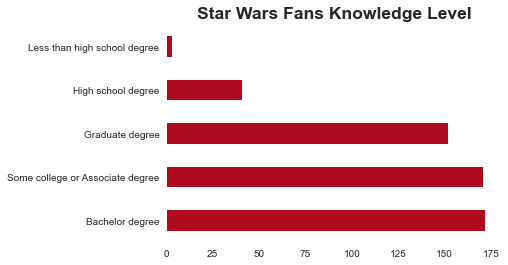

In [24]:
fig, ax = plt.subplots()

fans['Education'].value_counts().plot.barh(color= '#af0b1e', rot=0)
plt.title('Star Wars Fans Knowledge Level', fontsize= 17.5, weight= 'bold')

location = ['left', 'right', 'top', 'bottom']

for l in location:
    ax.spines[l].set_visible(False)

plt.show()

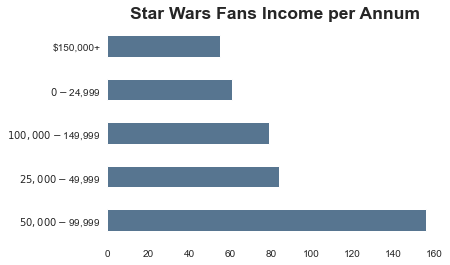

In [25]:
fig, ax = plt.subplots()

fans['Household Income'].value_counts().plot.barh(color= '#577590', rot=0)
plt.title('Star Wars Fans Income per Annum', fontsize= 17.5, weight= 'bold')

location = ['left', 'right', 'top', 'bottom']

for l in location:
    ax.spines[l].set_visible(False)

plt.show()

## Exploration of Regional Data

In [26]:
fans['Location (Census Region)'].value_counts(dropna = False)

South Atlantic        88
Pacific               86
East North Central    84
Middle Atlantic       64
West South Central    53
West North Central    53
Mountain              49
New England           44
East South Central    20
NaN                   11
Name: Location (Census Region), dtype: int64

    Getting rid of null values

In [27]:
fans = fans[fans["Location (Census Region)"].notnull()]
fans["Location (Census Region)"].value_counts(dropna=False)

South Atlantic        88
Pacific               86
East North Central    84
Middle Atlantic       64
West South Central    53
West North Central    53
Mountain              49
New England           44
East South Central    20
Name: Location (Census Region), dtype: int64

In [41]:
regions = { "sa_states" : ["DE", "MD", "VA", "WV", "NC", "SC", "GA", "FL", "DC"],
            "pacific" : ["AK", "CA", "HI", "OR", "WA"],
            "enc" : ["IL", "IN", "MI", "OH", "WI"],
            "mid_atl" : ["NJ", "NY", "PA"],
            "wsc" : ["AR", "LA", "OK", "TX"],
            "wnc" : ["IA", "KS", "MN", "MO", "NE", "ND", "SD"],
            "mountain" : ["AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY"],
            "ne" : ["ME", "VT", "NH", "MA", "CT", "RI"],
            "esc" : ["AL", "KY", "MS", "TN"],
          }

states = {}

def state_calc():
    for region in regions:
        if region == "sa_states":
            for state in regions[region]:
                states[state] = round(88 / len(regions[region]))
        elif region == "pacific":
            for state in regions[region]:
                states[state] = round(86 / len(regions[region]))
        elif region == "enc":
            for state in regions[region]:
                states[state] = round(84 / len(regions[region]))
        elif region == "mid_atl":
            for state in regions[region]:
                states[state] = round(64 / len(regions[region]))
        elif region == "wsc":
            for state in regions[region]:
                states[state] = round(53 / len(regions[region]))
        elif region == "wnc":
            for state in regions[region]:
                states[state] = round(53 / len(regions[region]))
        elif region == "mountain":
            for state in regions[region]:
                states[state] = round(49 / len(regions[region]))
        elif region == "ne":
            for state in regions[region]:
                states[state] = round(44 / len(regions[region]))
        elif region == "esc":
            for state in regions[region]:
                states[state] = round(20 / len(regions[region]))
                
state_calc()

df = pd.DataFrame.from_dict(states, orient="index", columns=["fans"])
df.reset_index(inplace=True)
df.rename({"index": "code"}, axis=1, inplace=True)

fig = go.Figure(data = go.Choropleth(
                                    locations = df["code"],
                                    z = df['fans'],
                                    locationmode = 'USA-states',

                                    colorbar_title = "Fans per state",
                                    )
               )

fig.update_layout(
                    title_text = 'Distribution of Star Wars Fans by States on Average',
                    geo_scope='usa'
                 )
fig.write_html("interactive_map.html")
fig.show()